## sales data Analysis 

in this project will delve into the a subtantialsales dataset to extract actionable insights crucial informed decision making , by analyzing sales data . aim to identify key trends top selling products and esssential revenue matrics pivotal for optimizing business stategies



In [2]:
import pandas as pd


In [3]:
sales_data = pd.read_csv('sales data.csv')


In [4]:
sales_data = sales_data.drop_duplicates()
print(sales_data)

        Unnamed: 0  Order ID                 Product  Quantity Ordered  \
0                0    295665      Macbook Pro Laptop                 1   
1                1    295666      LG Washing Machine                 1   
2                2    295667    USB-C Charging Cable                 1   
3                3    295668        27in FHD Monitor                 1   
4                4    295669    USB-C Charging Cable                 1   
...            ...       ...                     ...               ...   
185945       13617    222905  AAA Batteries (4-pack)                 1   
185946       13618    222906        27in FHD Monitor                 1   
185947       13619    222907    USB-C Charging Cable                 1   
185948       13620    222908    USB-C Charging Cable                 1   
185949       13621    222909  AAA Batteries (4-pack)                 1   

        Price Each           Order Date  \
0          1700.00  2019-12-30 00:01:00   
1           600.00  2019-

In [5]:
# Check for null values
print(sales_data.isnull().sum())

# Check for duplicates
print(sales_data.duplicated().sum())


Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64
0


Exploratory Data Analysis

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sales_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


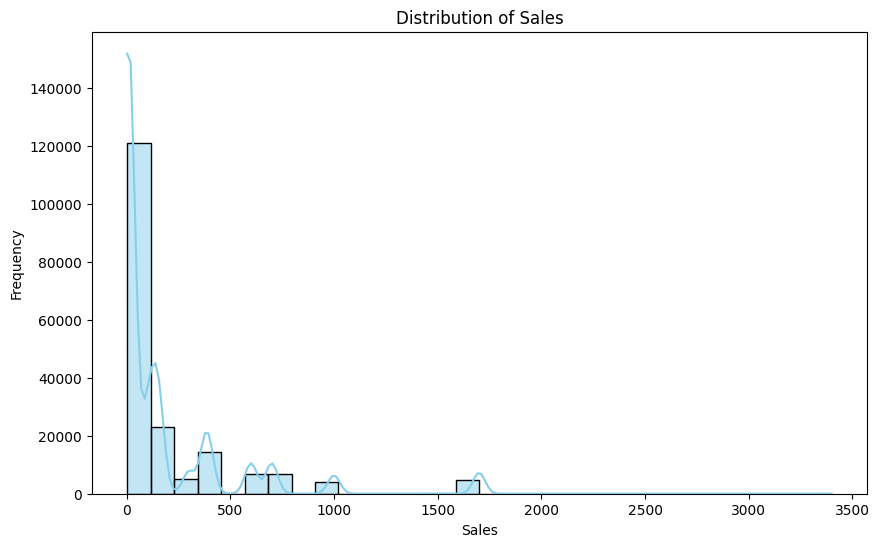

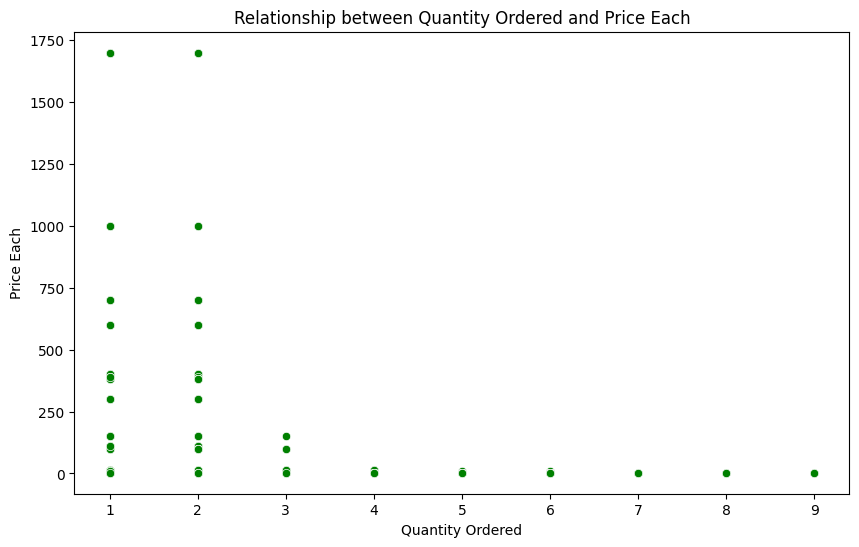

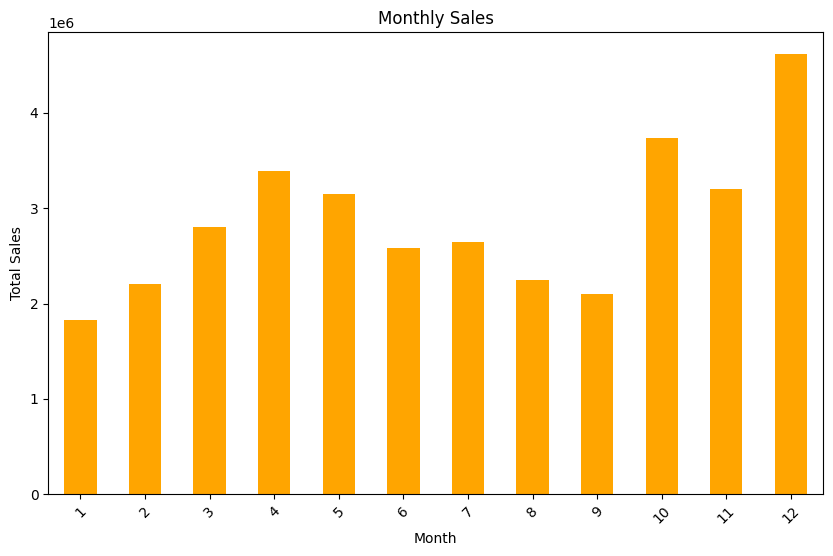

In [7]:
# Summary statistics
sales_summary = sales_data.describe()
sales_summary

# Visualize the distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['Sales'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between quantity ordered and price each
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity Ordered', y='Price Each', data=sales_data, color='green')
plt.title('Relationship between Quantity Ordered and Price Each')
plt.xlabel('Quantity Ordered')
plt.ylabel('Price Each')
plt.show()

# Explore sales trends over time
monthly_sales = sales_data.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='orange')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Top Selling Products

In [8]:
# Identify top selling products
top_selling_products = sales_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)
top_selling_products


Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64

Revenue Metrics

In [9]:
# Calculate total revenue
total_revenue = sales_data['Sales'].sum()
total_revenue

# Calculate average order value
average_order_value = sales_data['Sales'].mean()
average_order_value


185.490916751815

In [10]:
# Segment customers based on total spending
customer_segments = pd.qcut(sales_data['Sales'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
customer_segments.value_counts()


Sales
Low          60117
High         45453
Very High    42119
Medium       38261
Name: count, dtype: int64

Geographic Analysis

In [11]:
# Analyze sales performance across different cities
city_sales = sales_data.groupby('City')['Sales'].sum().sort_values(ascending=False)
city_sales




City
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
 Dallas           2767975.40
 Seattle          2747755.48
 Portland         2320490.61
 Austin           1819581.75
Name: Sales, dtype: float64

Time Analysis

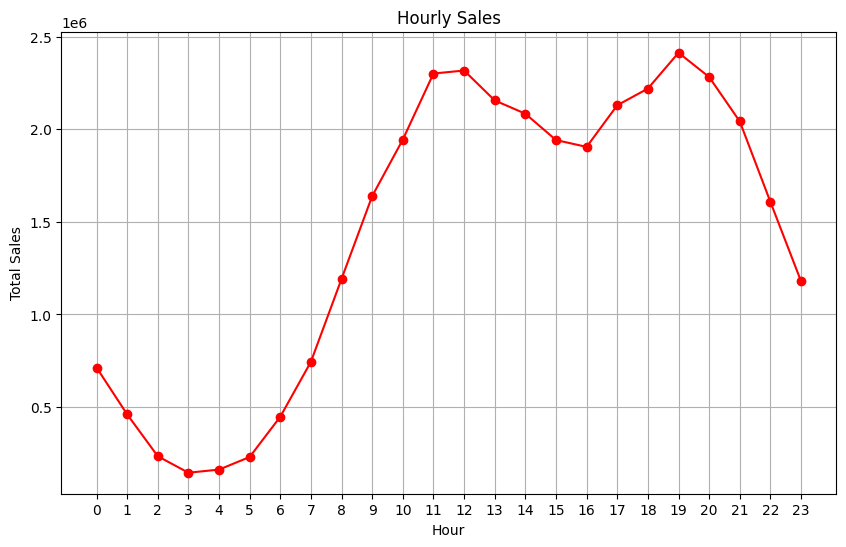

In [12]:
## Analyze sales trends by hour
hourly_sales = sales_data.groupby('Hour')['Sales'].sum()
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o', color='red')
plt.title('Hourly Sales')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.xticks(np.arange(0, 24, step=1))
plt.grid()
plt.show()


Correlation Analysis

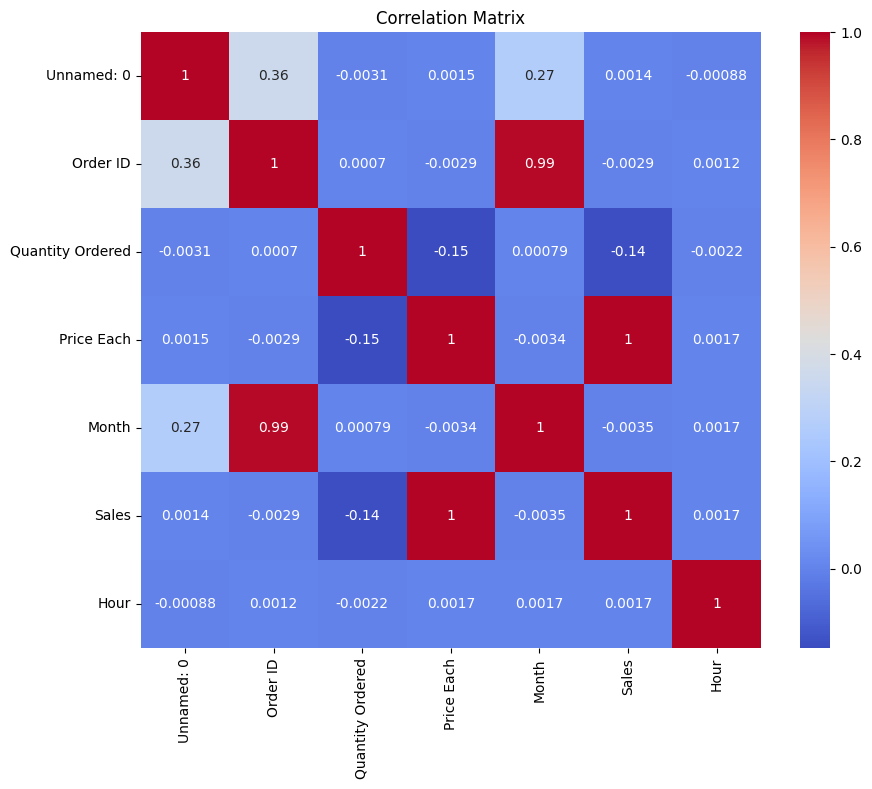

In [13]:
# Exclude non-numeric columns from the correlation calculation
numeric_columns = sales_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [15]:
X = sales_data[['Month', 'Hour']]  # Example features, you can add more relevant features
y = sales_data['Sales']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [18]:
y_pred = model.predict(X_test)

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [20]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 219.6557244414105
Mean Squared Error: 111474.2111853762
Root Mean Squared Error: 333.8775392046854
R^2 Score: -0.0014890538653549168


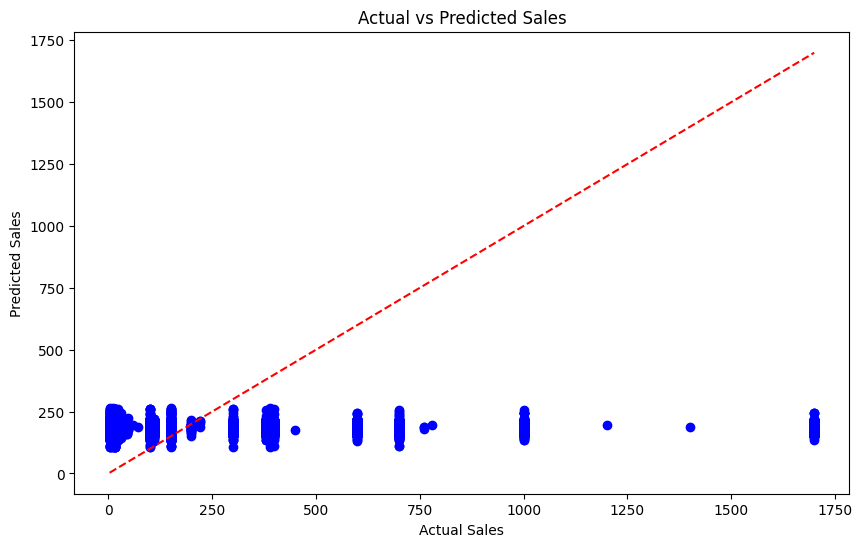

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


In [22]:
future_sales_features = pd.DataFrame({'Month': [13, 14], 'Hour': [8, 9]})  # Example features for future sales
future_sales_predictions = model.predict(future_sales_features)
print('Forecasted Future Sales:')
print(future_sales_predictions)

Forecasted Future Sales:
[205.4938997  191.87749992]


In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Date', y='Sales', data=sales_data)
plt.title('Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Sales', data=sales_data)
plt.title('Sales Performance by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
sales_data['Customer Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sales by Customer Segments')
plt.ylabel('')
plt.show()